In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2
%matplotlib inline

/home/jupyter/map-ephys


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from pipeline import tracking, foraging_analysis, lab, experiment
from pipeline.ingest import tracking as tracking_ingest
foraging_sessions = (foraging_analysis.SessionTaskProtocol & 'session_task_protocol in (100, 110, 120)').proj()


[2023-03-22 23:09:51,959][INFO]: Connecting map-superuser@datajoint.mesoscale-activity-map.org:3306
[2023-03-22 23:09:52,037][INFO]: Connected map-superuser@datajoint.mesoscale-activity-map.org:3306


Ingested foraging trackings

In [4]:
trial, video_file = tracking_ingest.TrackingIngestForaging.TrackingFile().fetch('trial', 'video_trial_num')

In [8]:
trial[trial != video_file]

array([213, 214, 215, ..., 429, 430, 431])

In [4]:
session_key = {'subject_id': 482353, 'session': 45}

In [17]:
tracking_ingest.TrackingIngestForaging & session_key

subject_id institution 6 digit animal ID,session session number,tracking_device device type/function
482353,45,Camera 0
482353,45,Camera 1


In [8]:
tracking_devices = (tracking.TrackingDevice & (tracking_ingest.TrackingIngestForaging & session_key)).fetch(as_dict=True)

In [9]:
trk_device = tracking_devices[0]

In [10]:
trk_device_name = trk_device['tracking_device'].replace(' ', '') + '_' + trk_device['tracking_position']

In [16]:
tracking.Tracking().tracking_features

[autoreload of pipeline.tracking failed: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 347, in update_generic
    update(a, b)
  File "/opt/conda/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 302, in update_class
    if update_generic(old_obj, new_obj): continue
  File "/opt/conda/lib/python3.7/site-packages/IPython/extension

{'NoseTracking': pipeline.tracking.Tracking.NoseTracking,
 'TongueTracking': pipeline.tracking.Tracking.TongueTracking,
 'JawTracking': pipeline.tracking.Tracking.JawTracking,
 'LeftPawTracking': pipeline.tracking.Tracking.LeftPawTracking,
 'RightPawTracking': pipeline.tracking.Tracking.RightPawTracking,
 'LickPortTracking': pipeline.tracking.Tracking.LickPortTracking,
 'WhiskerTracking': pipeline.tracking.Tracking.WhiskerTracking,
 'nose': pipeline.tracking.Tracking.NoseTracking,
 'tongue': pipeline.tracking.Tracking.TongueTracking,
 'tongue_side': pipeline.tracking.Tracking.TongueSideTracking,
 'jaw': pipeline.tracking.Tracking.JawTracking,
 'left_paw': pipeline.tracking.Tracking.LeftPawTracking,
 'right_paw': pipeline.tracking.Tracking.RightPawTracking,
 'whisker': pipeline.tracking.Tracking.WhiskerTracking,
 'pupil_side': pipeline.tracking.Tracking.PupilSideTracking}

In [5]:
foraging_video = (tracking.Tracking & foraging_sessions) * lab.WaterRestriction.proj(h2o='water_restriction_number') * experiment.Session.proj('session_date')
foraging_video

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,"tracking_samples number of events (possibly frame number, relative to the start of the trial)",h2o WR number,session_date
473360,49,1,Camera 0,2510,HH08,2021-08-12
473360,49,1,Camera 1,2510,HH08,2021-08-12
473360,49,1,Camera 2,829,HH08,2021-08-12
473360,49,2,Camera 0,1867,HH08,2021-08-12
473360,49,2,Camera 1,1867,HH08,2021-08-12
473360,49,2,Camera 2,616,HH08,2021-08-12
473360,49,3,Camera 0,3532,HH08,2021-08-12
473360,49,3,Camera 1,3532,HH08,2021-08-12
473360,49,3,Camera 2,1166,HH08,2021-08-12
473360,49,4,Camera 0,1980,HH08,2021-08-12


In [ ]:
foraging_sessions & tracking.Tracking

In [14]:
key = {'subject_id': 482353, 'session': 45}

In [15]:
tracking.Tracking.Frame & key & {'tracking_device': 'Camera 1'}

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,frame_time Global session-wise time (in sec)
482353,45,1,Camera 1,=BLOB=
482353,45,2,Camera 1,=BLOB=
482353,45,3,Camera 1,=BLOB=
482353,45,4,Camera 1,=BLOB=
482353,45,5,Camera 1,=BLOB=
482353,45,6,Camera 1,=BLOB=
482353,45,7,Camera 1,=BLOB=
482353,45,8,Camera 1,=BLOB=
482353,45,9,Camera 1,=BLOB=
482353,45,10,Camera 1,=BLOB=


In [16]:
tracking.Tracking.TongueTracking & key

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelihood
482353,45,1,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,2,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,3,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,4,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,5,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,6,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,7,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,8,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,9,Camera 1,=BLOB=,=BLOB=,=BLOB=
482353,45,10,Camera 1,=BLOB=,=BLOB=,=BLOB=


In [20]:
ingest_history = tracking_ingest.TrackingIngestForaging.TrackingFile & key
ingest_history

subject_id institution 6 digit animal ID,session session number,tracking_device device type/function,trial trial number (1-based indexing),video_trial_num cache the ni-to-video trial mapping,tracking_file tracking file subpath
482353,45,Camera 1,1,1,HH13/HH13_S10_20211117/bottom_face_1-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,2,2,HH13/HH13_S10_20211117/bottom_face_2-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,3,3,HH13/HH13_S10_20211117/bottom_face_3-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,4,4,HH13/HH13_S10_20211117/bottom_face_4-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,5,5,HH13/HH13_S10_20211117/bottom_face_5-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,6,6,HH13/HH13_S10_20211117/bottom_face_6-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,7,7,HH13/HH13_S10_20211117/bottom_face_7-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,8,8,HH13/HH13_S10_20211117/bottom_face_8-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,9,9,HH13/HH13_S10_20211117/bottom_face_9-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv
482353,45,Camera 1,10,10,HH13/HH13_S10_20211117/bottom_face_10-0000DLC_mobnet_100_Foraging_BotApr27shuffle3_500000.csv


In [28]:
look_up = pd.DataFrame(ingest_history.fetch())

In [3]:
key = {'subject_id': 482353, 'session': 42}

In [6]:
(tracking.Tracking * tracking.Tracking.TongueTracking) & key

subject_id institution 6 digit animal ID,session session number,trial trial number (1-based indexing),tracking_device device type/function,"tracking_samples number of events (possibly frame number, relative to the start of the trial)",tongue_x tongue x location (px),tongue_y tongue y location (px),tongue_likelihood tongue location likelihood
482353,42,1,Camera 1,2234,=BLOB=,=BLOB=,=BLOB=
482353,42,2,Camera 1,1377,=BLOB=,=BLOB=,=BLOB=
482353,42,3,Camera 1,1938,=BLOB=,=BLOB=,=BLOB=
482353,42,4,Camera 1,2284,=BLOB=,=BLOB=,=BLOB=
482353,42,5,Camera 1,1940,=BLOB=,=BLOB=,=BLOB=
482353,42,6,Camera 1,1502,=BLOB=,=BLOB=,=BLOB=
482353,42,7,Camera 1,2228,=BLOB=,=BLOB=,=BLOB=
482353,42,8,Camera 1,1749,=BLOB=,=BLOB=,=BLOB=
482353,42,9,Camera 1,1350,=BLOB=,=BLOB=,=BLOB=
482353,42,10,Camera 1,1461,=BLOB=,=BLOB=,=BLOB=


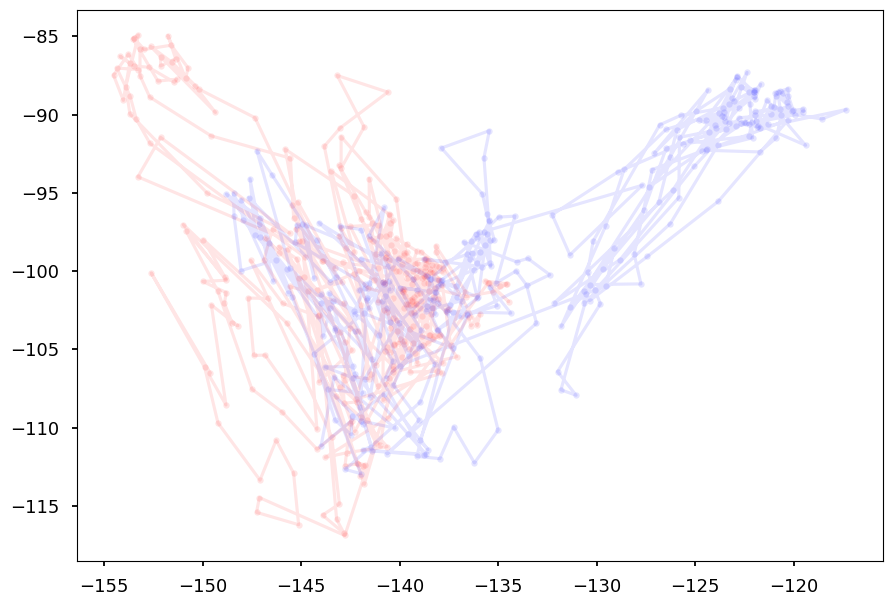

In [4]:
# np.random.seed(42)
for side, col in [['left', 'r'], ['right', 'b']]:
    this_trials = experiment.WaterPortChoice & key & {'water_port': side}
    xs, ys, likelihood = (tracking.Tracking.TongueTracking & key & this_trials).fetch('tongue_x', 'tongue_y', 'tongue_likelihood')
    random_trials = np.random.choice(len(xs), 1)
    
    for x, y, l in zip(xs[random_trials], ys[random_trials], likelihood[random_trials]):
        valid = l >= 0.9
        plt.plot(-x[valid], -y[valid], '.-', c=col, alpha=0.1)

plt.show()